# Exemple sur le tri en Python

## Allure de la courbe

In [194]:
from random import randrange
from timeit import repeat, timeit
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
from IPython.display import display

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

def make_array(length=100, max_range=1000):
    """returns an array of integers in [0, `max_range`[ of length `length`"""
    return [randrange(max_range) for _ in range(length)]


In [211]:
NB_EXECS = 1
MAX_EXPONENT = 6
MIN_EXPONENT = 1
NB_REPEAT = 5
BASE = 10

In [ ]:

results = {}

for length in range(BASE ** (MAX_EXPONENT - 1), BASE ** (MAX_EXPONENT) + 1, BASE ** (MAX_EXPONENT - 1)):
    print(f"Repeat {NB_REPEAT} times {NB_EXECS} executions on length {length}")
    test_array = make_array(length, 2 * length)
    results[length] = [
        t / NB_EXECS for t in repeat(lambda: sorted(test_array), repeat=NB_REPEAT, number=NB_EXECS)
    ]


In [195]:
data = (
    pd.DataFrame.from_dict(results, orient="index")
    .rename_axis(index="size")
    .melt(var_name="repeat", value_name="time", ignore_index=False)
    .reset_index()
    .sort_values(["size", "repeat"])
)
display(data)


,size,repeat,time
0,100000,0,0.013929
10,100000,1,0.013808
20,100000,2,0.013652
30,100000,3,0.013458
40,100000,4,0.013962
1,200000,0,0.028496
11,200000,1,0.027996
21,200000,2,0.027474
31,200000,3,0.026595
41,200000,4,0.028465


<AxesSubplot:xlabel='size', ylabel='time'>

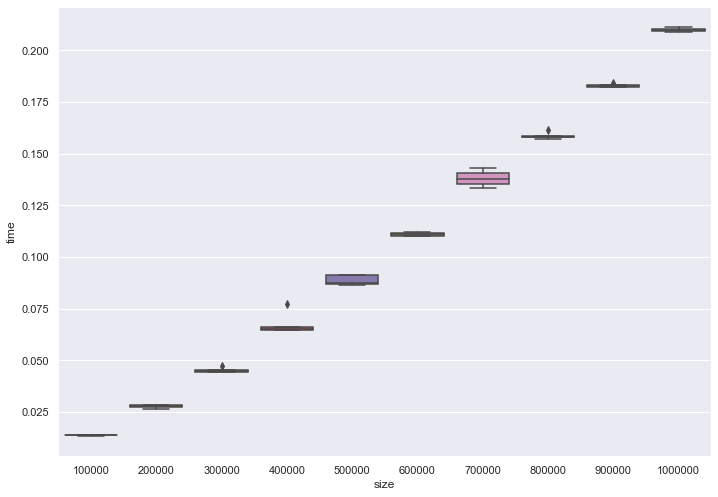

In [196]:
sns.boxplot(data=data, x = "size", y = "time")
# sns.scatterplot(data=data, x = "size", y = "time")

In [197]:
interp_n = smf.ols("time ~ I(size)", data=data).fit()
interp_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8327.
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.81e-55
Time:                        10:37:58   Log-Likelihood:                 195.73
No. Observations:                  50   AIC:                            -387.5
Df Residuals:                      48   BIC:                            -383.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0173      0.002    -11.526      0.000      -0.020      -0.014
I(size)     2.213e-07   2.43e-09     91.251      0.000    2.16e-07    2.26e-07
==============================================================================
Omnibus:                        5.714   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                3.486
Skew:                           0.459   Prob(JB):                        0.175
Kurtosis:                       2.088   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
interp_nlogn = smf.ols("time ~ I(size* np.log(size))", data=data).fit()
print(interp_nlogn.params)
interp_nlogn.summary()

Intercept                -1.100208e-02
I(size * np.log(size))    1.569216e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.323e+04
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           2.83e-60
Time:                        10:38:01   Log-Likelihood:                 207.26
No. Observations:                  50   AIC:                            -410.5
Df Residuals:                      48   BIC:                            -406.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0110      0.001     -9.605      0.000      -0.013      -0.009
I(size * np.log(size))  1.569e-08   1.36e-10    115.039      0.000    1.54e-08     1.6e-08
==============================================================================
Omnibus:                        5.744   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                3.504
Skew:                           0.460   Prob(JB):                        0.173
Kurtosis:                       2.087   Cond. No.                     1.74e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
data["pred"] = interp_nlogn.predict()



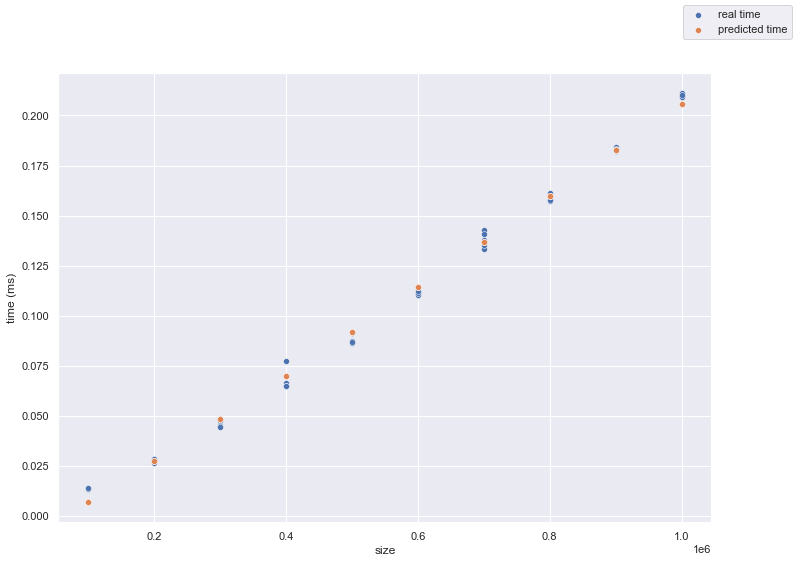

In [200]:
fig = plt.figure()
ax1 = sns.scatterplot(x="size", y="time", data=data)
ax2 = sns.scatterplot(x="size", y="pred", data=data)

ax2.set_ylabel("time (ms)")
fig.legend(labels=["real time", "predicted time"])
plt.show()


## Problème min-max

In [241]:
def my_min(arr):
    the_min = arr[0]
    for v in arr:
        if v < the_min:
            the_min = v

def my_max(arr):
    the_max = arr[0]
    for v in arr:
        if v > the_max:
            the_max = v

def ex_my_min_my_max(arr):
    return my_min(arr), my_max(arr)


def ex_min_max(arr):
    return min(arr), max(arr)


def ex_sorted(arr):
    s = sorted(arr)
    return s[0], s[-1]


def ex_manual(arr):
    the_min = arr[0]
    the_max = arr[0]
    for v in arr:
        if v < the_min:
            the_min = v
        if v > the_max:
            the_max = v

    return the_min, the_max


In [256]:
functs = (ex_my_min_my_max, ex_min_max, ex_sorted, ex_manual)


def do_exp_min_max(lengths):
    results = {}
    for length in lengths:
        result = {}
        for funct in functs:
            print(f"Repeat {NB_REPEAT} times {NB_EXECS} executions on length {length} for {funct.__name__}")
            test_array = make_array(length, 2 * length)
            times = repeat(lambda: funct(test_array), repeat=NB_REPEAT, number=NB_EXECS)
            result[funct.__name__] = [time / NB_EXECS for time in times]
        results[length] = result
    return [
        {"size": size, "function": f, "time": t} for size, res in results.items() for f, ts in res.items() for t in ts
    ]


Repeat 5 times 1 executions on length 10 for ex_my_min_my_max
Repeat 5 times 1 executions on length 10 for ex_min_max
Repeat 5 times 1 executions on length 10 for ex_sorted
Repeat 5 times 1 executions on length 10 for ex_manual
Repeat 5 times 1 executions on length 20 for ex_my_min_my_max
Repeat 5 times 1 executions on length 20 for ex_min_max
Repeat 5 times 1 executions on length 20 for ex_sorted
Repeat 5 times 1 executions on length 20 for ex_manual
Repeat 5 times 1 executions on length 30 for ex_my_min_my_max
Repeat 5 times 1 executions on length 30 for ex_min_max
Repeat 5 times 1 executions on length 30 for ex_sorted
Repeat 5 times 1 executions on length 30 for ex_manual
Repeat 5 times 1 executions on length 40 for ex_my_min_my_max
Repeat 5 times 1 executions on length 40 for ex_min_max
Repeat 5 times 1 executions on length 40 for ex_sorted
Repeat 5 times 1 executions on length 40 for ex_manual
Repeat 5 times 1 executions on length 50 for ex_my_min_my_max
Repeat 5 times 1 execution

<AxesSubplot:xlabel='size', ylabel='time'>

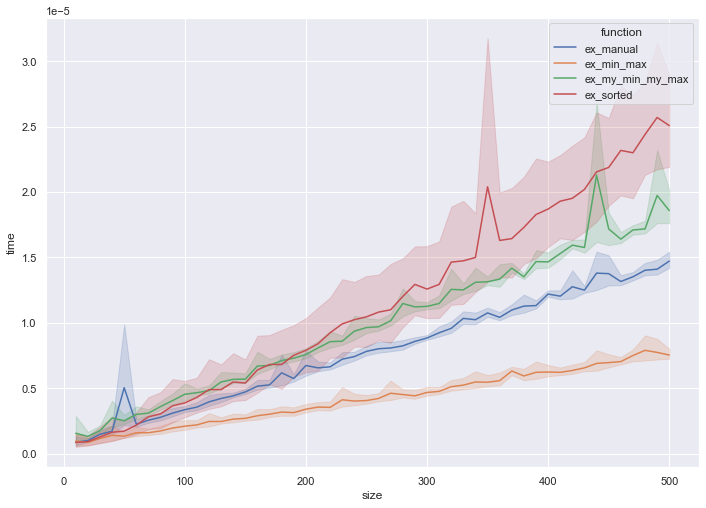

In [262]:
results = do_exp_min_max(range(10, 501, 10))

data = pd.DataFrame.from_records(
    results,
).sort_values(["size", "function"])

sns.lineplot(data=data, x="size", y="time", hue="function")


Repeat 5 times 1 executions on length 100000 for ex_my_min_my_max
Repeat 5 times 1 executions on length 100000 for ex_min_max
Repeat 5 times 1 executions on length 100000 for ex_sorted
Repeat 5 times 1 executions on length 100000 for ex_manual
Repeat 5 times 1 executions on length 200000 for ex_my_min_my_max
Repeat 5 times 1 executions on length 200000 for ex_min_max
Repeat 5 times 1 executions on length 200000 for ex_sorted
Repeat 5 times 1 executions on length 200000 for ex_manual
Repeat 5 times 1 executions on length 300000 for ex_my_min_my_max
Repeat 5 times 1 executions on length 300000 for ex_min_max
Repeat 5 times 1 executions on length 300000 for ex_sorted
Repeat 5 times 1 executions on length 300000 for ex_manual
Repeat 5 times 1 executions on length 400000 for ex_my_min_my_max
Repeat 5 times 1 executions on length 400000 for ex_min_max
Repeat 5 times 1 executions on length 400000 for ex_sorted
Repeat 5 times 1 executions on length 400000 for ex_manual
Repeat 5 times 1 executi

<AxesSubplot:xlabel='size', ylabel='time'>

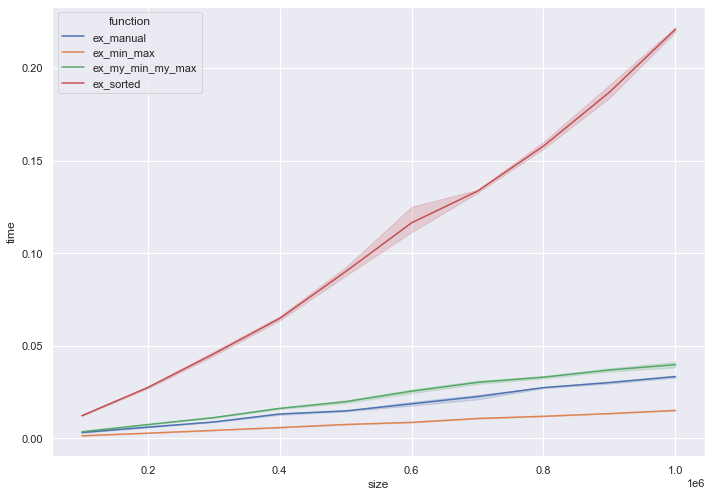

In [258]:
lengths = list(range(BASE ** (MAX_EXPONENT - 1), BASE ** (MAX_EXPONENT) + 1, BASE ** (MAX_EXPONENT - 1)))
results = do_exp_min_max(lengths)

data = pd.DataFrame.from_records(
    results,
).sort_values(["size", "function"])

sns.lineplot(data=data, x="size", y="time", hue="function")


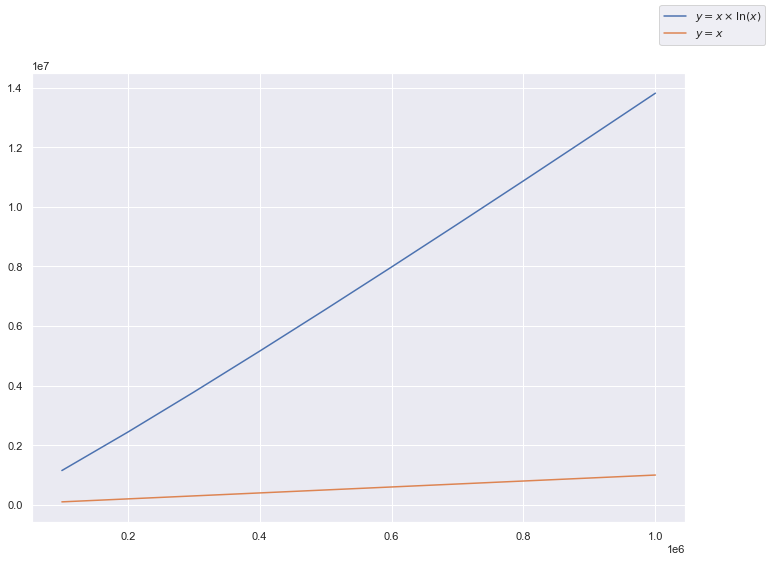

In [263]:
xs = lengths

fig = plt.figure()
sns.lineplot(x=xs, y= np.log(xs)*xs)
sns.lineplot(x=xs, y= xs)
fig.legend(labels=["$y = x \\times \\ln(x)$", "$y = x$"])
plt.show()